# EDA of IPL data 

Importing libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
%matplotlib inline

# Reading data

In [5]:
matches = pd.read_csv("matches.csv")
delivery =pd.read_csv("deliveries.csv")

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Renaming Match Id column in delivery Dataframe so that we can merge both dataframes into a single one

In [10]:
deliveries=delivery.rename(columns={'match_id':'id'})

In [12]:
merged=matches.merge(deliveries,on='id')

In [13]:
merged.shape

(179078, 38)

In [14]:
merged.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                179078 non-null  int64 
 1   season            179078 non-null  int64 
 2   city              177378 non-null  object
 3   date              179078 non-null  object
 4   team1             179078 non-null  object
 5   team2             179078 non-null  object
 6   toss_winner       179078 non-null  object
 7   toss_decision     179078 non-null  object
 8   result            179078 non-null  object
 9   dl_applied        179078 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       179078 non-null  int64 
 12  win_by_wickets    179078 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             179078 non-null  object
 15  umpire1           178578 non-null  object
 16  umpire2           178578 non-null  obj

# Checking Null values

In [16]:
merged.isnull().sum()

id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
f

# Dropping null values from columns having missing values greater than 80%

In [17]:
limitPer = len(merged) * .80
merged = merged.dropna(thresh=limitPer, axis=1)

In [18]:
merged.isnull().sum()

id                    0
season                0
city               1700
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
result                0
dl_applied            0
winner              372
win_by_runs           0
win_by_wickets        0
player_of_match     372
venue                 0
umpire1             500
umpire2             500
inning                0
batting_team          0
bowling_team          0
over                  0
ball                  0
batsman               0
non_striker           0
bowler                0
is_super_over         0
wide_runs             0
bye_runs              0
legbye_runs           0
noball_runs           0
penalty_runs          0
batsman_runs          0
extra_runs            0
total_runs            0
dtype: int64

In [19]:
merged.shape

(179078, 34)

# Checking duplicate values

In [20]:
merged.duplicated().sum()

24

In [21]:
merged =merged.drop_duplicates()

In [22]:
merged.duplicated().sum()

0

# Seasons

In [23]:
merged['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [24]:
len(merged['season'].unique())

12

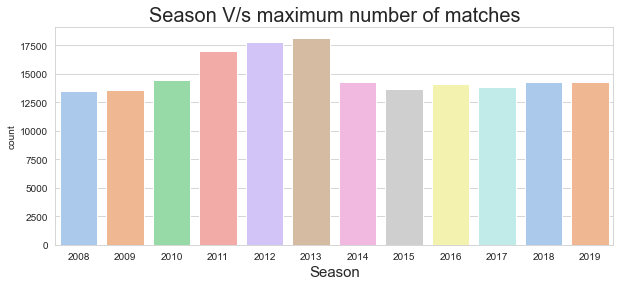

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='season', data=merged , palette="pastel")
plt.title("Season V/s maximum number of matches" , fontsize="20")
plt.xlabel("Season", fontsize="15")
plt.show()

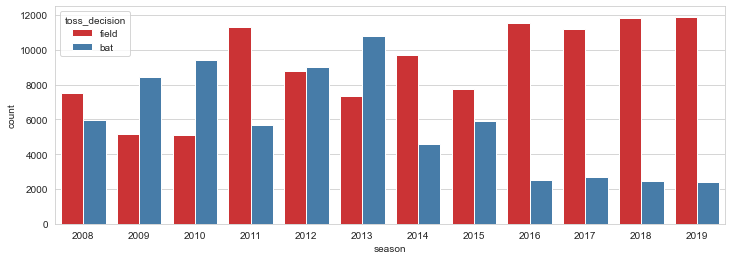

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='season', data=merged, hue=merged["toss_decision"] , palette="Set1")
plt.show()

From graph it's evident that season "2013" had maximum number of matches while season "2009" had minimum

# Number of matches

In [27]:
merged.groupby(merged["season"])['id'].unique()

season
2008    [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...
2009    [118, 119, 120, 121, 122, 123, 124, 125, 126, ...
2010    [175, 176, 177, 178, 179, 180, 181, 182, 183, ...
2011    [235, 236, 237, 238, 239, 240, 241, 242, 243, ...
2012    [308, 309, 310, 311, 312, 313, 314, 315, 316, ...
2013    [382, 383, 384, 385, 386, 387, 388, 389, 390, ...
2014    [458, 459, 460, 461, 462, 463, 464, 465, 466, ...
2015    [518, 519, 520, 521, 522, 523, 524, 525, 526, ...
2016    [577, 578, 579, 580, 581, 582, 583, 584, 585, ...
2017    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
2018    [7894, 7895, 7896, 7897, 7898, 7899, 7900, 790...
2019    [11137, 11138, 11139, 11140, 11141, 11142, 111...
Name: id, dtype: object

In [28]:
len(merged['id'].unique())

756

756 is the total number of matches in our dataset

# Visulazing matches played in city

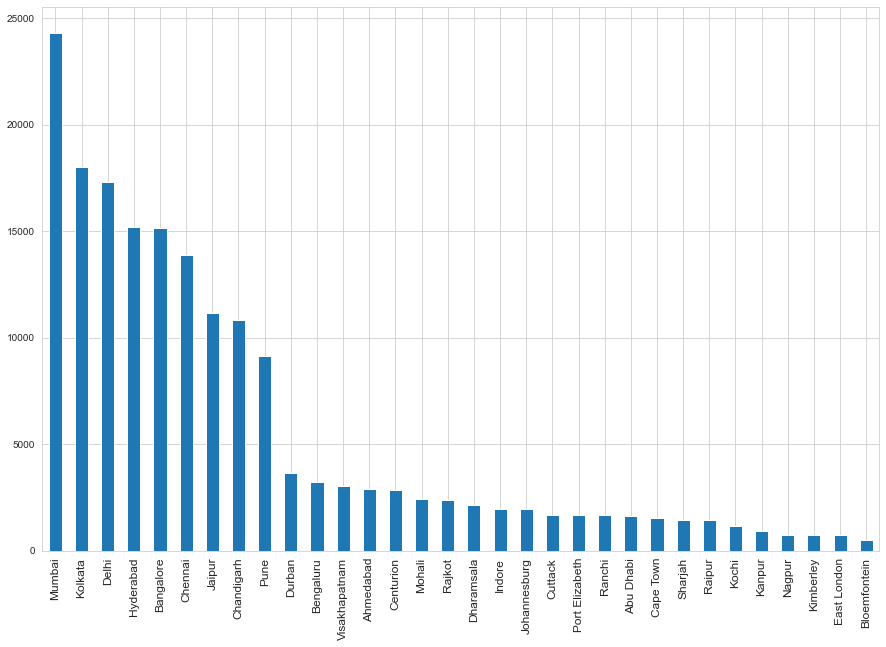

In [29]:
plt.figure(figsize=(15,10))
merged["city"].value_counts().plot(kind="bar")
plt.xticks(fontsize="12")
plt.show()

# Checking which team has won by maximum run and wickets

In [30]:
# Checking winner by max runs
merged.iloc[merged["win_by_runs"].idxmax()]['winner']

'Mumbai Indians'

In [31]:
# Checking winner by max wickets
merged.iloc[merged["win_by_wickets"].idxmax()]['winner']

'Kolkata Knight Riders'

# Checking Most Successful Team

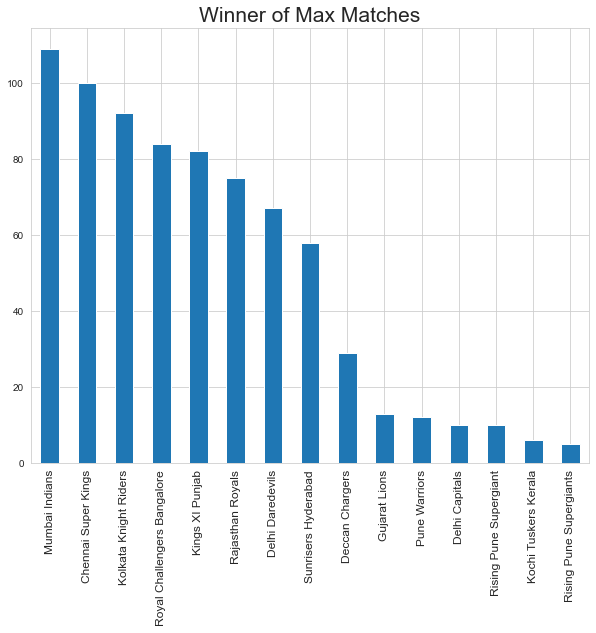

In [32]:
plt.figure(figsize=(10,8))
matches['winner'].value_counts().plot(kind="bar")
plt.title("Winner of Max Matches", fontsize="21")
plt.xticks(fontsize="12")
plt.show()

Mumbai Indians and CSK are most successful teams so far followed by KKR and RCB

# Let's see which player has won "Player of the match" title maximum times

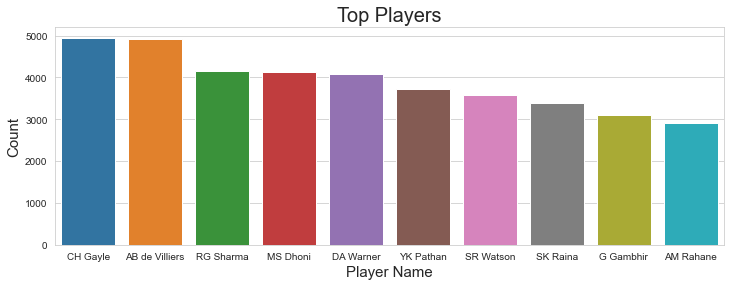

In [33]:
# Checking only Top 10 players
plt.figure(figsize=(12,4))
sns.barplot(x = merged['player_of_match'].value_counts()[:10].index , y=merged['player_of_match'].value_counts()[:10])
plt.title("Top Players" , fontsize="20")
plt.xlabel("Player Name",fontsize="15")
plt.ylabel("Count",fontsize="15")
plt.show()

# Chris Gayle, is the most successful IPL player, followed by AB de Villers and Rohit

# Exploring the toss data

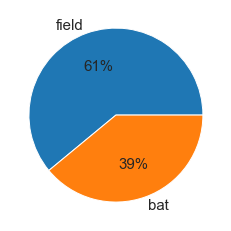

In [34]:
# matches['toss_decision'].value_counts()
label1 =merged['toss_decision'].value_counts().index
textprops = {"fontsize":15}
plt.pie(merged['toss_decision'].value_counts(), labels= label1,textprops =textprops,autopct = "%0.0f%%")
plt.show()

From pie chart we can see that to field first is maximum team's first choice

# Toss decision as per Venue

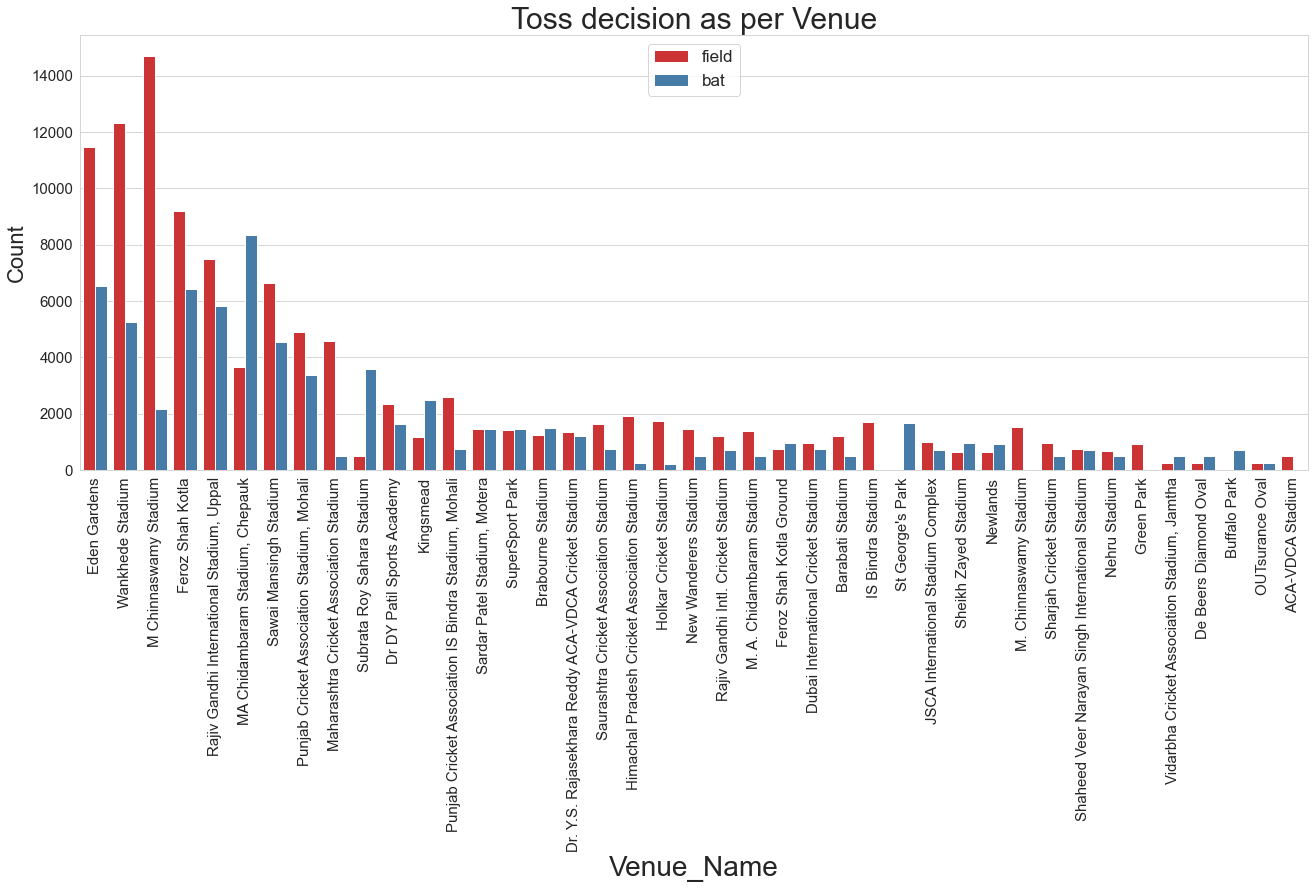

In [35]:
plt.figure(figsize=(22,8))
sns.countplot(x=merged['venue'], data=merged, hue=merged["toss_decision"] , palette="Set1",order=pd.value_counts(merged['venue']).index)
plt.xticks(rotation='vertical' , fontsize="15")
plt.yticks(fontsize="15")
plt.xlabel("Venue_Name", fontsize="28")
plt.title("Toss decision as per Venue" , fontsize="30")
plt.ylabel("Count" , fontsize="22")
plt.legend(fontsize="17")
plt.show()

# Does Toss_decision make any impact on result of match?

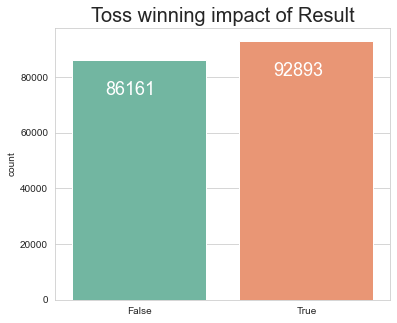

In [36]:
plt.figure(figsize=(6,5))
ax =sns.countplot(x =(merged['toss_winner'] == merged['winner']) , palette="Set2")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=18)
plt.title("Toss winning impact of Result", fontsize="20")
plt.show()

Statistically looking, we can assume that toss winning and match winning are actually correlted to some extent

# Analysis by runs

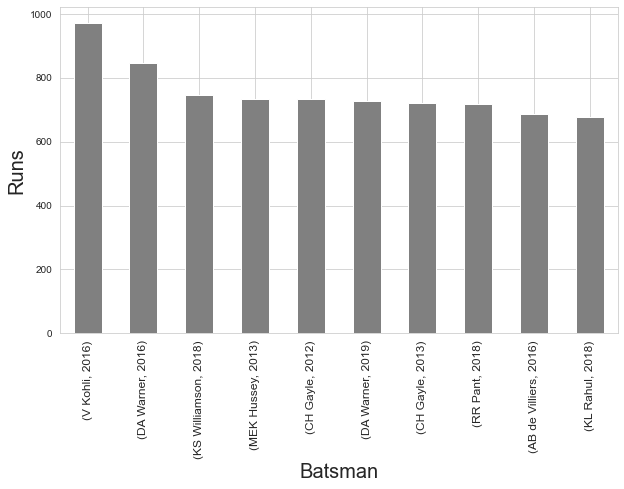

In [37]:
plt.figure(figsize=(10,6))
merged.groupby(['batsman','season'])['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind ="bar" ,color="0.5")
plt.xticks(fontsize="12")
plt.xlabel("Batsman", fontsize="20")
plt.ylabel("Runs" , fontsize="20")
plt.show()

Virat Kohli is at top of the list followed by SK Raina and Rohit Sharma

# Counting Centuries of Batsmans

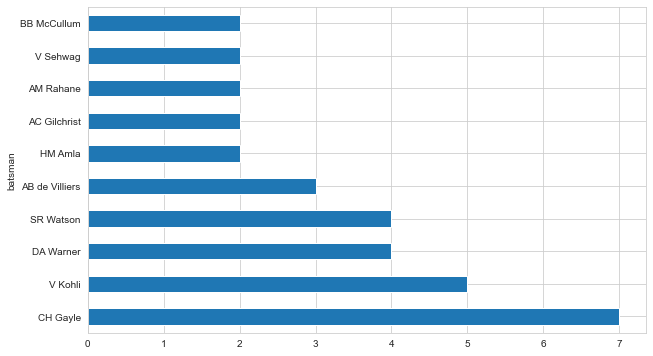

In [38]:
runs = merged.groupby(['batsman','id'])['batsman_runs'].sum()
plt.figure(figsize=(10,6))
runs[runs >= 100].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10].plot(kind="barh")
plt.show()

CH Gayle has maximum number of centuries followed by Virat

Similarly we can plot for Fifties

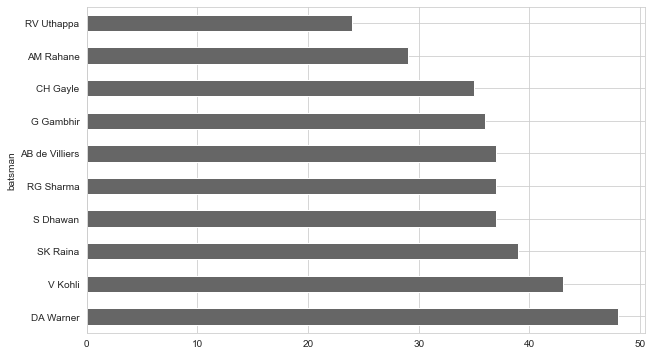

In [39]:
plt.figure(figsize=(10,6))
runs[runs >= 50].droplevel(level=1).groupby('batsman').count().sort_values(ascending=False)[:10].plot(kind="barh", color="0.4")
plt.show()

# Batsmans with maximum run during seasons

In [42]:
data = merged.groupby(['season','batsman'])['batsman_runs'].sum().groupby('season').max()
temp=pd.DataFrame(merged.groupby(['season','batsman'])['batsman_runs'].sum())
for season,run in data.items():
    player = temp.loc[season][temp.loc[season]['batsman_runs'] == run].index[0]
    print(season,'\t ',player,'\t',run)

2008 	  SE Marsh 	 616
2009 	  ML Hayden 	 572
2010 	  SR Tendulkar 	 617
2011 	  CH Gayle 	 608
2012 	  CH Gayle 	 733
2013 	  MEK Hussey 	 733
2014 	  RV Uthappa 	 660
2015 	  DA Warner 	 562
2016 	  V Kohli 	 973
2017 	  DA Warner 	 641
2018 	  KS Williamson 	 747
2019 	  DA Warner 	 727


# Most sixes in IPL

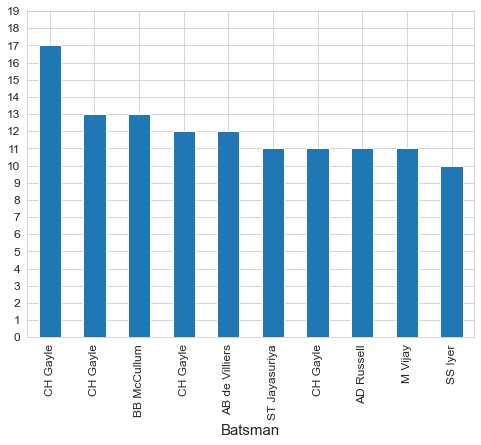

In [43]:
plt.figure(figsize=(8,6))
merged[merged['batsman_runs'] == 6].groupby(['date','batsman']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10].plot(kind="bar")
plt.xticks(fontsize="12")
plt.yticks(range(0,20),fontsize="12")
plt.xlabel("Batsman",fontsize="15")
plt.show()

# Most Fours in IPL

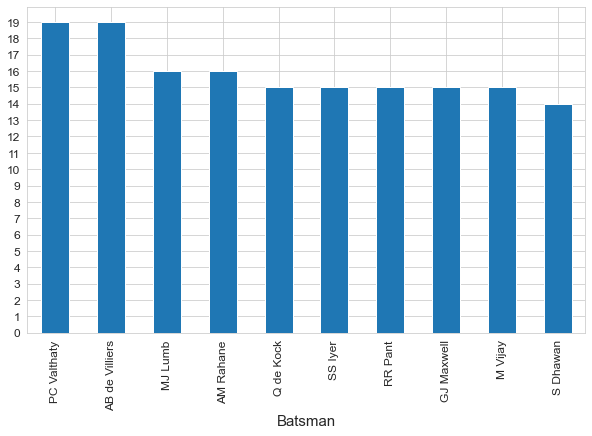

In [44]:
plt.figure(figsize=(10,6))
merged[merged['batsman_runs'] == 4].groupby(['date','batsman']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10].plot(kind="bar")
plt.xticks(fontsize="12")
plt.yticks(range(0,20),fontsize="12")
plt.xlabel("Batsman",fontsize="15")
plt.show()

# Checking maiden overs

In [45]:
data1 =merged.groupby(["over","bowler","date"]).sum()["total_runs"]
data1[data1.values == 0].droplevel(level=[0,2]).index.value_counts().head(10)

P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
DS Kulkarni        7
B Kumar            7
DJ Bravo           6
Sandeep Sharma     6
Z Khan             5
R Ashwin           5
Name: bowler, dtype: int64

# Most No balls 

<AxesSubplot:>

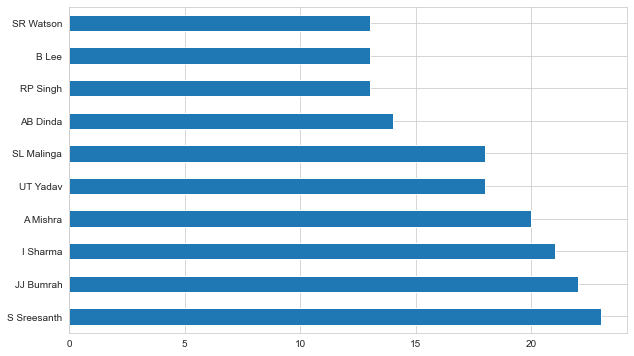

In [46]:
plt.figure(figsize=(10,6))
merged[merged["noball_runs"] != 0]["bowler"].value_counts().head(10).plot(kind="barh")

# Checking wide balls

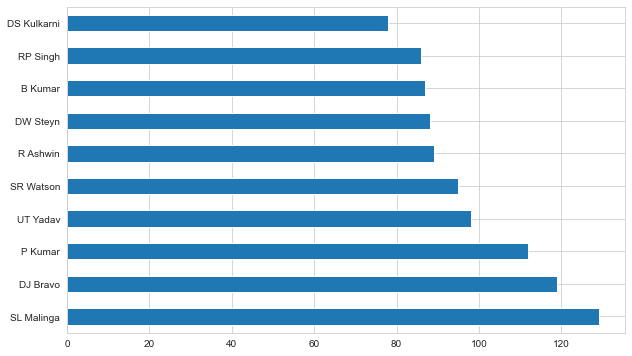

In [49]:
plt.figure(figsize=(10,6))
merged[merged["wide_runs"] != 0]["bowler"].value_counts().head(10).plot(kind="barh")
plt.show()

# Checking extra runs

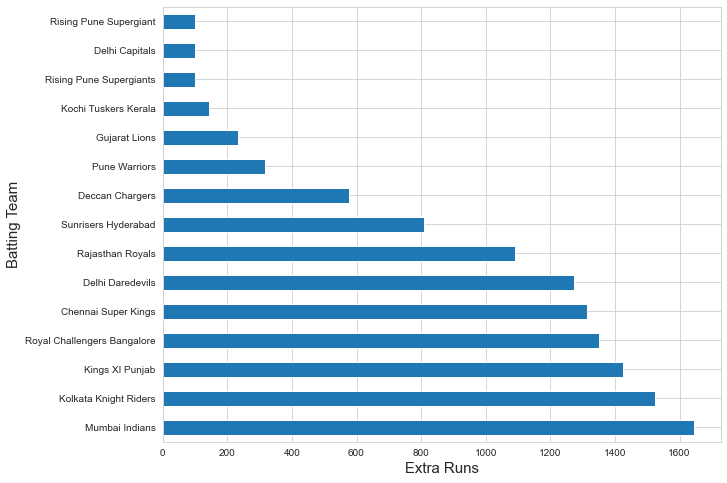

In [48]:
plt.figure(figsize=(10,8))
merged.groupby(['batting_team'])['extra_runs'].agg('sum').sort_values(ascending=False).plot(kind="barh")
plt.ylabel("Batting Team",fontsize="15")
plt.xlabel("Extra Runs",fontsize="15")
plt.show()

# Conclusions

Mumbai Indians and CSK are most successful teams so far followed by KKR and RCB

Checking various factors like "Player of the match" title and runs (fours, sixes etc.) We can conclude that below players have been most successful players and a company should endorse them for their products:

# Chrish Gayle
# Rohit Sharma
# V Kohli
# AB de villiers
# MS Dhoni